#  Исследование сервиса аренды самокатов GoFast.
В вашем распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках. Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.Из данных у нас в наличии три таблицы,первая с данными о пользователях,вторая с поездками пользователей и третья с тарифами(с подпиской и без нее).Нужно будет загрузить данные,проверить их на пропуски и дубликаты,провести анализ данных,добавить новые столбцы,объеденить таблицы,посчитать выручку и проверить гипотезы.

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd

import numpy as np

from scipy import stats as st

import matplotlib.pyplot as plt

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv', sep=',')
    rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    users = pd.read_csv('/datasets/users_go.csv', sep=',')
    rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides.head(30)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод:** Мы имеем дело с тремя таблицами. В первой данные о пользователях, уникальный идентификатор пользователя, имя пользователя, возраст, город и тип подписки. Во второй данные о поездках, расстояние, продолжительность и дата сесии. В третьей тариф компании для пользователей с подпиской и без нее. Число пользоватей состовляет 1565 человек, каждый в среднем пользовался сервисом около 12 раз, есть те кто пользуется с подпиской и без нее, данные за 2021 год.


#### Предобработка данных

##### Работа со столбцом date

In [8]:
rides['date'] = pd.to_datetime(rides['date'])

#####  Создание нового столбца с номером месяца

In [9]:
rides['month'] = rides['date'].dt.month

##### Проверка наличия пропущенных значений и дубликатов в датафреймах.

In [10]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
rides.duplicated().sum()

0

In [13]:
users.duplicated().sum()

31

In [14]:
users[users.duplicated(subset = ['user_id','age', 'city', 'name'], keep = False)].head(31)

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
120,121,Алина,25,Пятигорск,ultra
126,127,Павел,25,Пятигорск,ultra
135,136,Марсель,25,Тюмень,ultra
152,153,Герман,23,Москва,ultra
203,204,Руслан,30,Пятигорск,ultra


In [15]:
users = users.drop_duplicates()

**Вывод:** Привел столбец date к типу даты pandas, создал новый столбец с номером месяца на основе столбца date, проверил на пропуски три таблицы,пропусков нет, есть дубликаты в таблице в колличестве 31,удалил их, так как они будут мешать дальнейшему анализу.

#### Исследовательский анализ данных

##### Частота встречаемости городов

In [16]:
users['city'].value_counts().to_frame()

,city
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


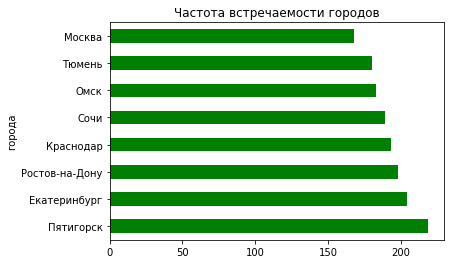

In [17]:
users['city'].value_counts().plot.barh(title='Частота встречаемости городов', xlabel='города', color='g');

**Вывод:** Визуализировал информацию о частоте встречаемости городов, чаще всего сервисом пользовались Пятигорске - 219 раз, меньше всего в Москве - 168 раз.

##### Соотношение пользователей с подпиской и без подписки

In [18]:
users['subscription_type'].value_counts().to_frame()

,subscription_type
free,835
ultra,699


In [19]:
free_percent = users[users['subscription_type'] == 'free']['subscription_type'].count() / users['subscription_type'].count()

ultra_percent = 1 - free_percent

(f'процент без подписки : {free_percent:.1%}, процент c подпиской : {ultra_percent:.1%}')

'процент без подписки : 54.4%, процент c подпиской : 45.6%'

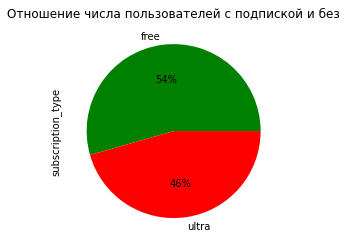

In [20]:
users['subscription_type'].value_counts().plot(
    title='Отношение числа пользователей с подпиской и без', 
    kind='pie', autopct='%1.0f%%', colors={'r', 'g'});

**Вывод:** Изучил данные о количестве пользователей с подпиской и без нее, число пользователей без подписки больше чем тех,кто с подпиской, а именно 54.4 % и 45.6% соответственно.

##### Возраст пользователей

In [21]:
users['age'].value_counts().to_frame()

,age
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71
30,68


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

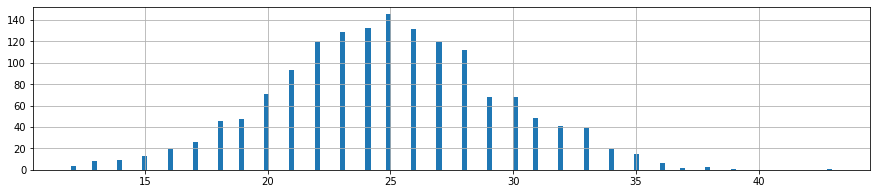

In [22]:
users.age.hist(bins = 150, figsize = (15,3));

users['age'].describe()

**Вывод:** Больше всего польватей в возрасте 25 лет, меньше всего тем кому за 30 лет. Диапозон возрасной группы,которые чаще пользуются сервисом от 20 до 30.Основная часть данных с 22 до 28 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

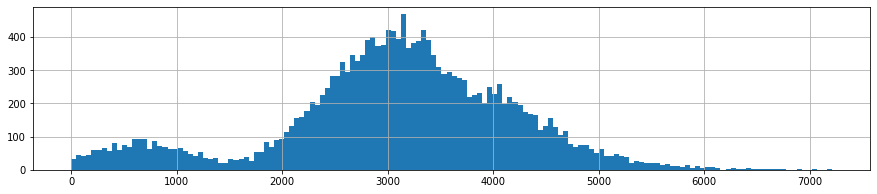

In [23]:
rides.distance.hist(bins = 150, figsize = (15,3));

rides['distance'].describe()

count    541.000000
mean      21.908398
std        8.424680
min        0.500000
25%       19.012941
50%       23.529532
75%       27.204407
max       40.823963
Name: duration, dtype: float64

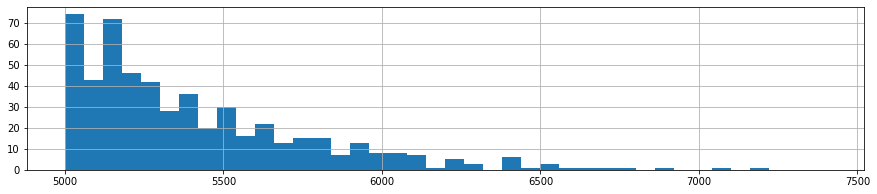

In [24]:
rides.distance.hist(bins = 40, figsize = (15,3), range = (5000,7400));

rides.query('distance > 5000')['duration'].describe()

count    1372.000000
mean        9.555959
std         3.823324
min         2.035632
25%         6.397153
50%         9.336174
75%        12.832299
max        18.235650
Name: duration, dtype: float64

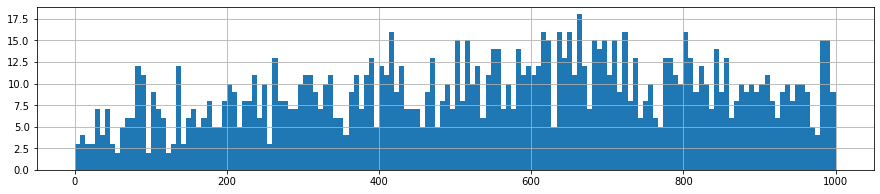

In [25]:
rides.distance.hist(bins = 150, figsize = (15,3), range = (0,1000));

rides.query('distance < 1000')['duration'].describe()

**Вывод:** Взглянув на графики, можно утверждать что большинство пользователей проезжает расстояние в 3200 м за одну сессию, есть и такие кто проезжал более 7 км, и менее 200 м.Основная часть данных с 2543 м до 3776 м.

##### Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

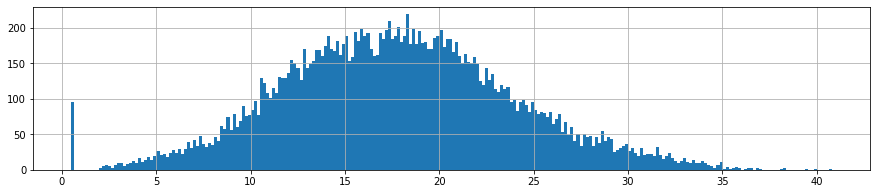

In [26]:
rides.duration.hist(bins = 250, figsize = (15,3));

rides['duration'].describe()

count    543.000000
mean      32.132113
std        1.707219
min       30.001753
25%       30.792967
50%       31.731236
75%       33.080427
max       40.823963
Name: duration, dtype: float64

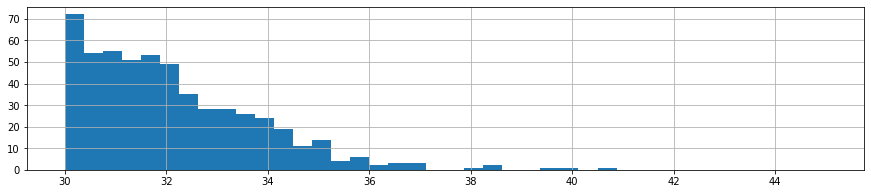

In [27]:
rides.duration.hist(bins = 40, figsize = (15,3), range = (30,45));

rides.query('duration > 30')['duration'].describe()

count    278.000000
mean       2.715662
std        1.728951
min        0.500000
25%        0.500000
50%        3.192398
75%        4.316825
max        4.998773
Name: duration, dtype: float64

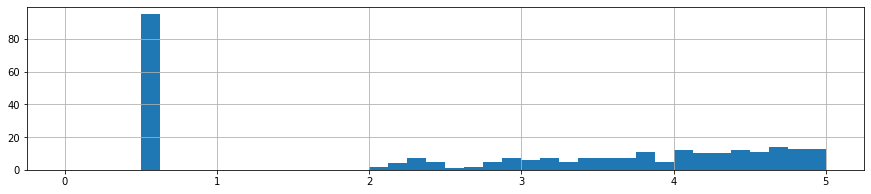

In [28]:
rides.duration.hist(bins = 40, figsize = (15,3), range = (0,5));

rides.query('duration < 5')['duration'].describe()

**Вывод:** Взглянув на графики, можно утверждать что большинство пользователей пользуется сервисом около 18 минут, также есть пользователи, которые пользовались сервисом за одну сессию более 36 минут и те кто пользовались менее одной минуты.Основная часть данных с 13 до 21 минуты.

#### Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [29]:
data = users.merge(rides, on='user_id', how='left')

In [30]:
df = data.merge(subscriptions, on='subscription_type', how='left')
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


##### Создание датафреймов c данными о пользователях без подписки и с подпиской

In [31]:
df_ultra = df.query('subscription_type == "ultra"')
df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [32]:
df_free = df.query('subscription_type == "free"')
df_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


**Вывод:** Объеденил три таблицы в одну и создал две отдельные для пользователей с подпиской и без нее.

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

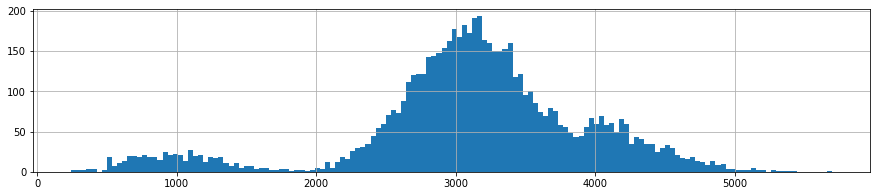

In [33]:
df_ultra.distance.hist(bins = 150, figsize = (15,3));

In [34]:
df_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [35]:
ultra_distance = df_ultra.pivot_table(index=['user_id'], values='distance',aggfunc=['sum']).sum() / 1000
ultra_distance.round(1)

sum  distance    20250.4
dtype: float64

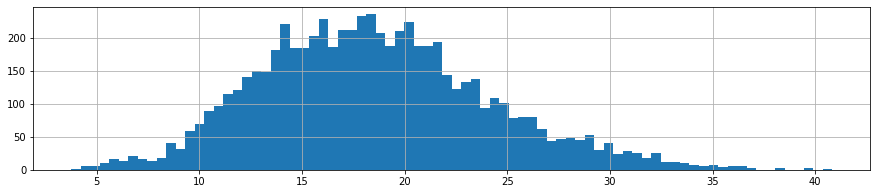

In [36]:
df_ultra.duration.hist(bins = 80, figsize = (15,3));

In [37]:
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [38]:
ultra_duration = df_ultra.pivot_table(index=['user_id'], values='duration',aggfunc=['sum']).sum() / 60
ultra_duration.round(1)

sum  duration    2008.7
dtype: float64

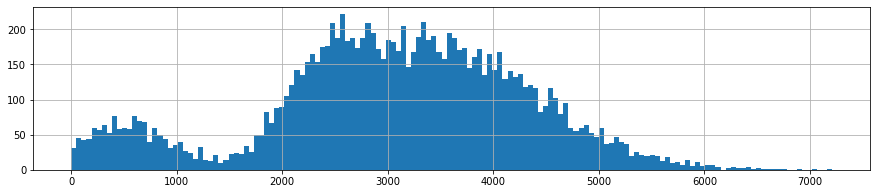

In [39]:
df_free.distance.hist(bins = 150, figsize = (15,3));

In [40]:
df_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [41]:
free_distance = df_free.pivot_table(index=['user_id'], values='distance',aggfunc=['sum']).sum() / 1000
free_distance.round(1)

sum  distance    35230.3
dtype: float64

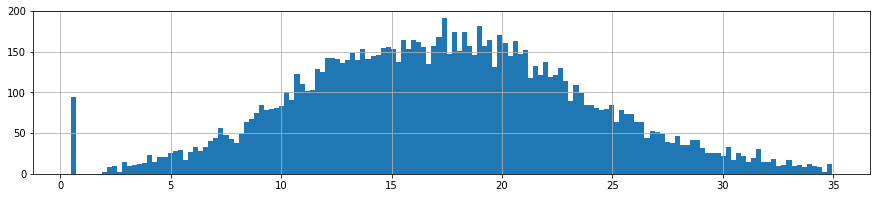

In [42]:
df_free.duration.hist(bins = 150, figsize = (15,3));

In [43]:
df_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [44]:
free_duration = df_free.pivot_table(index=['user_id'], values='duration',aggfunc=['sum']).sum() / 60
free_duration.round(1)

sum  duration    3353.0
dtype: float64

**Вывод:** Визуализировал данные о расстоянии и времени поездок для пользователей обеих категорий, в среднем они проезжают одинаковое расстояние за одну сессию, а время затраченное на одну поездку и пользователей с подпиской в среднем больше на 1 минуту и составляет 18 минут. Изучив данные о сумме времени и дистанции поездок для обеих категорий, можно сказать что пользователи без подписки проехали больше и дольше, это логичный вывод,если брать в расчет их большее количество.

####  Подсчёт выручки

##### Датафрейм с агрегированными данными о поездках

In [45]:
df['duration'] = np.ceil(df['duration'])
df['distance'] = df['distance'].round(1)

In [46]:
df2 = df.pivot_table(index=['user_id', 'month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'], values=['distance', 'duration'],aggfunc={'distance': ['count', np.sum], 'duration': np.sum})
df3 = df2.reset_index()
df3. columns = ['user_id', 'month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee', 'count', 'distance_sum', 'duration_sum']
df3

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,count,distance_sum,duration_sum
0,1,1,ultra,6,0,199,2,7027.5,42.0
1,1,4,ultra,6,0,199,1,754.2,7.0
2,1,8,ultra,6,0,199,2,6723.5,46.0
3,1,10,ultra,6,0,199,2,5809.9,32.0
4,1,11,ultra,6,0,199,3,7003.5,56.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,2,3409.4,26.0
11327,1534,8,free,8,50,0,2,7622.4,48.0
11328,1534,9,free,8,50,0,1,4928.2,23.0
11329,1534,11,free,8,50,0,4,13350.0,78.0


##### Помесячная выручка каждого пользователя	

In [47]:
df3['revenue'] = df3['start_ride_price'] * df3['count'] + df3['minute_price'] * df3['duration_sum'] + df3['subscription_fee']
df3

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,count,distance_sum,duration_sum,revenue
0,1,1,ultra,6,0,199,2,7027.5,42.0,451.0
1,1,4,ultra,6,0,199,1,754.2,7.0,241.0
2,1,8,ultra,6,0,199,2,6723.5,46.0,475.0
3,1,10,ultra,6,0,199,2,5809.9,32.0,391.0
4,1,11,ultra,6,0,199,3,7003.5,56.0,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,2,3409.4,26.0,308.0
11327,1534,8,free,8,50,0,2,7622.4,48.0,484.0
11328,1534,9,free,8,50,0,1,4928.2,23.0,234.0
11329,1534,11,free,8,50,0,4,13350.0,78.0,824.0


In [48]:
# Код ревьюера
df3.groupby('subscription_type')['revenue'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: revenue, dtype: float64

**Вывод:** На этом этапе я округлил продолжительность каждой поездки в каждой строке исходного датафрейма до следующего целого числа и округлил дистанцию до 1 знака. Далее я создал датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и нашел суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Так же добавил столбец с помесячной выручкой, которую принёс каждый пользователь.

#### Шаг 6. Проверка гипотез

##### Проверка гипотезы -  " тратят ли пользователи с подпиской больше времени на поездки"

- Нулевая гипотеза: средние значения времени пользователей из двух групп равны.
- Альтернативная гипотеза: среднее значение времени пользователей с подпиской больше, чем среднее значение времени пользователей без подписки.

In [49]:
alpha = .05

results = st.ttest_ind(
    df_ultra['duration'], 
    df_free['duration'], 
     alternative='greater')

print(f'p-value: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**вывод:** Пользователи с подпиской тратят больше времени на поездки,чем те кто без.

##### Проверка гипотезы - "Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров"

- Нулевая гипотеза: средние значения расстояния пользователей не превышает 3130 метров.
- Альтернативная гипотеза:  среднее значения расстояния пользователей превышает 3130 метров.

In [51]:
optimal_distance = 3130

alpha = .05

results = st.ttest_1samp(
    df_ultra['distance'], 
    optimal_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Средняя дитанция, которую проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.

##### Проверка гипотезы - "будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки"

- Нулевая гипотеза: средние значения выручки пользователей из двух групп равны.
- Альтернативная гипотеза: среднее значение выручки от пользователей с подпиской больше, чем среднее значение выручки от пользователей без подписки.

In [52]:
first_group_ultra = df3.query('subscription_type == "ultra"')

second_group_free = df3.query('subscription_type == "free"')

alpha = .05

results = st.ttest_ind(
    first_group_ultra['revenue'], 
    second_group_free['revenue'], 
     alternative='greater')

print(f'p-value: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** Есть основания говорить, что выручка от пользователей с подпиской выше чем без нее.

##### Выбор теста для проверки этой гипотезы

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотезы,нам нужен метод о равенстве средних гипотез для зависимых (парных) выборок.

#### Шаг 7. Распределения

#### Шаг Общий вывод

По итогам проделанной работы было сделанно следующее:
##### Открыл файл с данными и изучил иформацию
- Загрузил данные из файла в датафрейм.
- Вывел первые строки каждого набора данных. Изучил общую информацию о каждом датафрейме.Число пользоватей состовляет 1565 человек, каждый в среднем пользовался сервисом около 12 раз, есть те кто пользуется с подпиской и без нее, данные за 2021 год.
##### Предобработал данные
- Привел столбец date к типу даты pandas.
- Создал новый столбец с номером месяца на основе столбца date.
- Проверил наличие пропущенных значений и дубликатов в датафреймах.Пропусков нет, есть дубликаты в таблице в колличестве 31,удалил их, так как они будут мешать дальнейшему анализу.
##### Исследовательский анализ данных
- Визуализировал информацию о частоте встречаемости городов, чаще всего сервисом пользовались Пятигорске - 219 раз, меньше всего в Москве - 168 раз.
- Изучил данные о количестве пользователей с подпиской и без нее, число пользователей без подписки больше чем тех,кто с подпиской, а именно 54.4 % и 45.6% соответственно.
- Изучил данные о возрасте пользователей, больше всего польватей в возрасте 25 лет, меньше всего тем кому за 30 лет. Диапозон возрасной группы,которые чаще пользуются сервисом от 20 до 30.Основная часть данных с 22 до 28 лет.
- зучил данные о расстоянии, которое пользователь преодолел за одну поездку, можно утверждать что большинство пользователей проезжает расстояние в 3200 м за одну сессию, есть и такие кто проезжал более 7 км, и менее 200 м.Основная часть данных с 2543 м до 3776 м.
- Изучил данные о времени пользования, можно утверждать что большинство пользователей пользуется сервисом около 18 минут, также есть пользователи, которые пользовались сервисом за одну сессию более 36 минут и те кто пользовались менее одной минуты.Основная часть данных с 13 до 21 минуты.
##### Объединенил данные
- Объеденил три таблицы в одну и создал две отдельные для пользователей с подпиской и без нее.
- Визуализировал данные о расстоянии и времени поездок для пользователей обеих категорий, в среднем они проезжают одинаковое расстояние за одну сессию, а время затраченное на одну поездку и пользователей с подпиской в среднем больше на 1 минуту и составляет 18 минут. Изучив данные о сумме времени и дистанции поездок для обеих категорий, можно сказать что пользователи без подписки проехали больше и дольше, это логичный вывод,если брать в расчет их большее количество.
##### Посчитал выручку
-  На этом этапе я округлил продолжительность каждой поездки в каждой строке исходного датафрейма до следующего целого числа и округлил дистанцию до 1 знака. Далее я создал датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и нашел суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
- Так же добавил столбец с помесячной выручкой, которую принёс каждый пользователь.
##### Проверил гипотезы
- Проверив гипотезу - " тратят ли пользователи с подпиской больше времени на поездки,чем те кто без нее".Нулевая гипотеза: средние значения времени пользователей из двух групп равны.Альтернативная гипотеза: среднее значение времени пользователей с подпиской больше, чем среднее значение времени пользователей без подписки.Пользователи с подпиской тратят больше времени на поездки,чем те кто без.
- Проверив гипотезу - "Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров".Нулевая гипотеза: средние значения расстояния пользователей не превышает 3130 метров.Альтернативная гипотеза: среднее значения расстояния пользователей превышает 3130 метров. Можно сделать вывод что  Средняя дитанция, которую проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.
- Проверив гипотезу - "будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки",Нулевая гипотеза: средние значения выручки пользователей из двух групп равны.Альтернативная гипотеза: среднее значение выручки от пользователей с подпиской больше, чем среднее значение выручки от пользователей без подписки. Можно сделать вывод то выручка от пользователей с подпиской выше чем без нее.
- Для проверки данной гипотезы,нам нужен метод о равенстве средних гипотез для зависимых (парных) выборок.

  **Пользователи с подпиской являются более выгодными для компании.**
